### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
!pip3 install -U tensorflow --quiet

In [3]:
import tensorflow as tf
tf.set_random_seed(42)

In [4]:
tf.__version__

'1.15.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [8]:

print(trainY[0:10])

[9 0 0 3 0 2 7 2 5 5]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
import numpy as np
import pandas as pd

In [10]:
trainX.shape

(60000, 28, 28)

In [11]:
trainY.shape

(60000,)

In [13]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


In [0]:
train1Y = tf.keras.utils.to_categorical(trainY, num_classes=10)
test1Y = tf.keras.utils.to_categorical(testY, num_classes=10)

In [15]:
print(train1Y.shape)
print('First 5 examples now are: ', train1Y[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

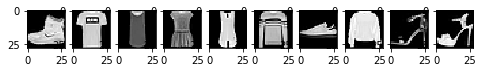

'label of Image = [9 0 0 3 0 2 7 2 5 5]'

In [16]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 1
for i in range(1, columns*rows+1):
    
    img = trainX[i-1]
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img,cmap='gray')
plt.show()

'label of Image = {}'.format(trainY[0:10]) ## np.argmax(trainY1[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
testY = test1Y.astype('float32')
train1Y = train1Y.astype('float32')

In [0]:
from sklearn.preprocessing import StandardScaler

In [19]:
trainX.shape

(60000, 28, 28)

In [0]:
transformer = StandardScaler()
testX_z = transformer.fit_transform(testX.reshape(784,10000))
trainX_z = transformer.fit_transform(trainX.reshape(784,60000))

In [0]:
trainX_z = trainX_z.reshape(60000, 28, 28)
testX_z = testX_z.reshape(10000, 28, 28)


In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

In [0]:

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 200)               2

### Execute the model using model.fit()

In [38]:
model.fit(trainX_z,train1Y,          
          validation_data=(testX_z,test1Y),
          epochs=20,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1255 - val_loss: 0.0941
Epoch 2/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0918 - val_loss: 0.0907
Epoch 3/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0904 - val_loss: 0.0902
Epoch 4/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0901 - val_loss: 0.0901
Epoch 5/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0900 - val_loss: 0.0900
Epoch 6/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0900 - val_loss: 0.0900
Epoch 7/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0900 - val_loss: 0.0900
Epoch 8/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0900 - val_loss: 0.0900
Epoch 9/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.09

In [39]:
input_data = np.expand_dims(testX_z[0], axis=0)
input_data.shape

(1, 28, 28)

In [0]:
pred = model.predict(input_data)


In [43]:
pred[0]

array([0.10005206, 0.10002804, 0.09992489, 0.1000739 , 0.10001743,
       0.09998444, 0.10001957, 0.09993154, 0.10000116, 0.09993339],
      dtype=float32)

In [44]:

np.argmax(pred[0])

3

In [49]:
testX_z[1].shape

(28, 28)

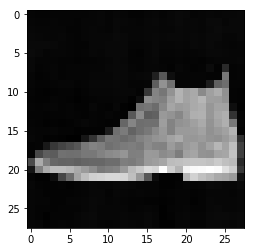

In [50]:

#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX_z[0],cmap='gray')

In [51]:

np.argmax(testY[0])

9

In [0]:
#Get predicted number with highest probability
predicted_num = np.argmax(pred[0])


In [53]:


#Print the number
print(predicted_num)

3


In [54]:

testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

### Execute the model

In [63]:
model.fit(trainX_z, train1Y, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 149us/sample - loss: 2.3028 - acc: 0.1236
Epoch 2/50
60000/60000 [==============================] - 8s 139us/sample - loss: 2.2737 - acc: 0.2230
Epoch 3/50
60000/60000 [==============================] - 8s 141us/sample - loss: 2.1222 - acc: 0.2514
Epoch 4/50
60000/60000 [==============================] - 8s 136us/sample - loss: 1.7744 - acc: 0.2995
Epoch 5/50
60000/60000 [==============================] - 8s 138us/sample - loss: 1.6679 - acc: 0.3638
Epoch 6/50
60000/60000 [==============================] - 9s 143us/sample - loss: 1.6007 - acc: 0.4346
Epoch 7/50
60000/60000 [==============================] - 9s 143us/sample - loss: 1.4631 - acc: 0.5005
Epoch 8/50
60000/60000 [==============================] - 8s 139us/sample - loss: 1.2730 - acc: 0.5637
Epoch 9/50
60000/60000 [==============================] - 9s 157us/sample - loss: 1.1207 - acc: 0.6227
Epoch 10/50
60000/60000 [=========================

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [0]:
model.get_weights()

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [0]:

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [0]:

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [0]:

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_17 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [75]:
model.fit(trainX_z, train1Y, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 142us/sample - loss: 2.3043 - acc: 0.1258
Epoch 2/50
60000/60000 [==============================] - 8s 141us/sample - loss: 2.2811 - acc: 0.2072
Epoch 3/50
60000/60000 [==============================] - 8s 139us/sample - loss: 2.2194 - acc: 0.3251
Epoch 4/50
60000/60000 [==============================] - 8s 139us/sample - loss: 1.8998 - acc: 0.3537
Epoch 5/50
60000/60000 [==============================] - 8s 140us/sample - loss: 1.5717 - acc: 0.4532
Epoch 6/50
60000/60000 [==============================] - 8s 137us/sample - loss: 1.3506 - acc: 0.5163
Epoch 7/50
60000/60000 [==============================] - 8s 137us/sample - loss: 1.1984 - acc: 0.5638
Epoch 8/50
60000/60000 [==============================] - 8s 138us/sample - loss: 1.0887 - acc: 0.5991
Epoch 9/50
60000/60000 [==============================] - 8s 137us/sample - loss: 0.9996 - acc: 0.6293
Epoch 10/50
60000/60000 [=========================

In [0]:

##model.compile(optimizer=sgd_optimizer, loss='mse')

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.003)

In [0]:

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_20 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [83]:
model.fit(trainX_z, train1Y, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/sample - loss: 1.5440 - acc: 0.5919
Epoch 2/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.8706 - acc: 0.7369
Epoch 3/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6916 - acc: 0.7644
Epoch 4/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.6135 - acc: 0.7862
Epoch 5/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5651 - acc: 0.8008
Epoch 6/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5307 - acc: 0.8123
Epoch 7/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5071 - acc: 0.8197
Epoch 8/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4875 - acc: 0.8271
Epoch 9/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4738 - acc: 0.8313
Epoch 10/50
60000/60000 [==============================] - 

## Review model

### Run the model